# Linear Latent Variable Models



## Modeling with latent variables

Let's say we have a dataset $X = \{ \textbf{x}_1, \textbf{x}_2, \ldots, \textbf{x}_N\}$ with $\dim (\textbf{x}) =D$ and we want to model the generative distribution $p(\textbf{x})$

Each sample has $D$ components or attributes (e.g. the pixels of an image): These are the **observed variables** 

To model $p(\textbf{x})$ we may expand the joint probability between the attributes using the rules of probability

$$
p(x_1, x_2, \ldots, x_D) = p(x_D|x_{D-1}, \ldots, x_1) \cdot p(x_{D-1}| , x_{D-1}\ldots, x_1) \cdots p(x_3|x_1, x_1) \cdot p(x_2|x_1) \cdot p(x_1)
$$

which is known as a **fully observed model**

:::{warning}

Unless we introduce independence between some of the variables the above representation is impractical for high dimensional problems (e.g. images)

:::

:::{hint}

Assume that what we observe is correlated due to *hidden causes*

:::

These hidden causes are represented as **latent variables** and models with latent variables are called **Latent Variable Models** (LVMs)

Mathematically, we impose that the observed variables are conditionally independent given the latent variables $\textbf{z}$, this is

$$
p(x_1, x_2, \ldots, x_D|\textbf{z}) = p(x_D|\textbf{z}) \cdot p(x_{D-1}|\textbf{z}) \cdots p(x_3|\textbf{z}) \cdot p(x_2|\textbf{z}) \cdot p(x_1|\textbf{z})
$$

where in general $\dim(\textbf{z})\ll\dim(\textbf{x})$

The following figure shows the graphical model of a fully observed model with five observed variables and an LVM with two latent variables

<img src="images/LVM.png" width="700">

For the LVM we can write the marginal as

$$
\begin{align}
p(\textbf{x}) &= \int_z p(\textbf{x}, \textbf{z}) \,d\textbf{z} \nonumber \\
&= \int_\textbf{z} p(\textbf{x}|\textbf{z}) p(\textbf{z}) \,d\textbf{z} \nonumber
\end{align}
$$

Did we gain anything?  (YES)

:::{important}

This strategy allows us to model a complex $p(x)$ by proposing a simple $p(z)$ (easy to sample from) and a transformation $p(x|z)$ 

:::

The integral above is intractable for non-linear transformations (neural networks), in that case we resort to approximate inference

This lecture is focused on LVMs for continuous data. First we will review an example with a tractable posterior (PCA) and then the more modern LVM based on neural networks: The Variational Autoencoder

## A short review of PCA

Principal Component Analysis (PCA) is an algorithm to reduce the dimensionality of continous data

For a dataset $X = (x_1, x_2, \ldots, x_N) \in \mathbb{R}^{N \times D}$, in PCA we 

1. Compute covariance matrix $C = \frac{1}{N} X^T X$
1. Solve the eigenvalue problem $(C - \lambda I)W = 0$

This comes from the following objective

$$
\max_W W^T C W, \text{s.t.} ~ W^T W = I,
$$

*i.e.* PCA finds an **orthogonal transformation** $W$ that **maximizes the variance** of the projected data $XW$

:::{important}

By reducing the amount of columns of $W$ we reduce the dimensionality of $XW$

:::

**Example:** Classical PCA for MNIST using JAX

We will use the MNIST handwritten digits dataset:

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../utils')))
from mnist import mnist
train_images, train_labels, test_images, test_labels = mnist()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
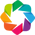

:Layout
   .Image.I    :Image   [x,y]   (z)
   .Image.II   :Image   [x,y]   (z)
   .Image.III  :Image   [x,y]   (z)
   .Image.IV   :Image   [x,y]   (z)
   .Image.V    :Image   [x,y]   (z)
   .Image.VI   :Image   [x,y]   (z)
   .Image.VII  :Image   [x,y]   (z)
   .Image.VIII :Image   [x,y]   (z)
   .Image.IX   :Image   [x,y]   (z)
   .Image.X    :Image   [x,y]   (z)

In [2]:
import holoviews as hv
hv.extension('bokeh')
hv.opts.defaults(hv.opts.Image(cmap='gray', xaxis=None, yaxis=None))

examples = [hv.Image(example.reshape(28, 28)) for example in test_images[:10]]
hv.Layout(examples).opts(hv.opts.Image(width=100, height=100)).cols(5)

Implementation of PCA using [`jax.numpy.eigh`](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.linalg.eigh.html):

In [3]:
import numpy as np
import jax.numpy as jnp

class PCA:
    def __init__(self, data, K=2):
        self.data_mean = data.mean(axis=0)
        data_centered = data - self.data_mean
        C = jnp.dot(data_centered.T, data_centered)
        L, W = jnp.linalg.eigh(C, symmetrize_input=False)
        # eigh, returns sorted by L (eigenvals) in ascending order
        self.L = L[-K:]
        self.W = W[:, -K:]
        
    def get_eigenvalues(self):
        return self.L
    
    def encode(self, x):
        return jnp.dot(x - self.data_mean, self.W)
    
    def decode(self, z):
        return self.data_mean + jnp.dot(z, self.W.T)

In this example the $28\times28$ observed dimensions of PCA are projected to two continuous latent variables 

In [4]:
pca = PCA(train_images, K=2)
z = pca.encode(test_images)
xhat = pca.decode(z)
z

DeviceArray([[-2.9325423 ,  1.3030709 ],
             [ 3.747396  , -0.08111978],
             [ 1.6895869 ,  3.7099552 ],
             ...,
             [-2.3406672 ,  1.0596066 ],
             [ 0.42589757,  1.2315243 ],
             [ 0.35495937, -4.087756  ]], dtype=float32)

We can then inspect the latent space and images reconstructed from it

In [5]:
scatter_plot = []
for digit in range(10):
    mask = test_labels.argmax(axis=1) == digit
    scatter_plot.append(hv.Scatter((z[mask, 0], z[mask, 1]), 'z0', 'z1', label=f"{digit}"))
    
hv.Overlay(scatter_plot).opts(width=550, height=400, legend_position='right')

:Overlay
   .Scatter.A_0 :Scatter   [z0]   (z1)
   .Scatter.A_1 :Scatter   [z0]   (z1)
   .Scatter.A_2 :Scatter   [z0]   (z1)
   .Scatter.A_3 :Scatter   [z0]   (z1)
   .Scatter.A_4 :Scatter   [z0]   (z1)
   .Scatter.A_5 :Scatter   [z0]   (z1)
   .Scatter.A_6 :Scatter   [z0]   (z1)
   .Scatter.A_7 :Scatter   [z0]   (z1)
   .Scatter.A_8 :Scatter   [z0]   (z1)
   .Scatter.A_9 :Scatter   [z0]   (z1)

In [6]:
examples = [hv.Image(example.reshape(28, 28)) for example in test_images[:5]]
reconstructed = [hv.Image(example.reshape(28, 28)) for example in np.array(xhat[:5])]

hv.Layout(examples + reconstructed).opts(hv.opts.Image(width=100, height=100)).cols(5)

:Layout
   .Image.I    :Image   [x,y]   (z)
   .Image.II   :Image   [x,y]   (z)
   .Image.III  :Image   [x,y]   (z)
   .Image.IV   :Image   [x,y]   (z)
   .Image.V    :Image   [x,y]   (z)
   .Image.VI   :Image   [x,y]   (z)
   .Image.VII  :Image   [x,y]   (z)
   .Image.VIII :Image   [x,y]   (z)
   .Image.IX   :Image   [x,y]   (z)
   .Image.X    :Image   [x,y]   (z)

The two most important principal components in this case are

In [7]:
eigvectors = [hv.Image(np.array(eigvec.reshape(28, 28))) for eigvec in pca.W.T]
hv.Layout(eigvectors).opts(hv.opts.Image(width=200, height=200))

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

:::{note}

Clearly wwo continous latent variables are not enough to model the digits given this linear model. Later we will see how this changes using non-linear models

:::

## Probabilistic interpretation for PCA

We can give a probabilistic interpretation to PCA as an LVM

The observed data $x_i \in \mathbb{R}^D$ is modeled as

$$
x_i = W z_i + B + \epsilon, ~i=1,\ldots,N
$$


where 

- $B \in \mathbb{R}^D$ is the mean of $X$
- $W \in \mathbb{R}^{D\times K}$ is a linear transformation matrix
- $\epsilon$ is a noise vector
- $z_i \in  \mathbb{R}^K$ is a continuous latent variable with $K\ll D$

:::{note}

$x$ (observed) is related to $z$ (latent) via a **linear mapping**

:::

The PCA model has the following assumptions

1. The noise is independent and Gaussian distributed with variance $\sigma^2$
1. The latent variable has a standard Gaussian prior

Using these we can write

$$
p(x_i | z_i) = \mathcal{N}(B + W z_i, I \sigma^2)
$$

and 

$$
p(z_i) = \mathcal{N}(0, I)
$$

Given that the Gaussian is conjugate to itself the marginal likelihood is

$$
\begin{split}
p(x) &= \int p(x|z) p(z) \,dz  \\
&= \mathcal{N}(x|B, W W^T + I\sigma^2 ) 
\end{split}
$$

:::{note}

We have parameterized a Gaussian with full covariance from two Gaussians with diagonal covariance

::

The parameters of the marginal come from

- $\mathbb{E}[x] = W\mathbb{E}[z] + B + \mathbb{E}[\epsilon] = B$
- $\mathbb{E}[(Wz + \epsilon)(Wz + \epsilon)^T] = W \mathbb{E}[zz^T] W^T + \mathbb{E}[\epsilon \epsilon^T] = W W^T + I\sigma^2$


**The posterior**

Using this formalism we can write the posterior as

$$
p(z|x) = \mathcal{N}(z|M^{-1}W^T(x-B), M\sigma^{-2} )
$$

which can be used to move from observed to latent dimension, where

$$
M = W^T W + I\sigma^2
$$

**Training**

We find $W$, $B$ and $\sigma$ that best fit the data by maximizing the log marginal likelihood

$$
\hat W, \hat B, \hat \sigma^2 = \text{arg} \max_{W, B, \sigma^2} \sum_{i=1}^N \log p(x_i)
$$

which has a closed form analytical solution. 

:::{note}

The solution for $W$ is equivalent to conventional PCA ($\sigma^2 \to 0$). The main difference is that we have $\sigma$ and we can generate data with $p(x|z)p(z)$

:::

:::{seealso}

For more details on PCA and probabilistic PCA see [chapters 15 and 21 in D. Barber's book](http://web4.cs.ucl.ac.uk/staff/D.Barber/textbook/200620.pdf)

:::